In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_comparative_histograms(dfs_list, names, titles, metric, dataset, age=True, bottom = False):
    # Set the theme for seaborn plots
    sns.set_theme(style='white')

    # Create the subplot grid
    
    shape = len(dfs_list) + 1 * age
    fig, axes = plt.subplots(1, shape, figsize=(8 * shape, 8))
    fig.tight_layout(pad=5)

    # Create a color palette for the labels
    palette = sns.color_palette()

    # Iterate through the datasets and plot the histograms
    for i, (dfs, name, title) in enumerate(zip(dfs_list, names, titles)):
        # Select the axes for the subplot
        if shape == 1:
            ax = axes
        else:
            ax = axes[i+1]

        # Plot histograms for each dataframe in the pair
        for j, df in enumerate(dfs):
            values = df[metric]
            bins = np.linspace(0.65, 1.0, 20)
            sns.histplot(data=values, kde=True, bins=bins, ax=ax, stat='density', alpha=0.5, label=name[j], color=palette[j])

        # Set the title and axis labels
        if "Max" in metric:
            ax.set_title(title, fontsize=26)
        else:
            ax.set_title(title, fontsize=26)

        if bottom:
            ax.set_xlabel("RCA-estimated DSC", fontsize=24)
        else:
            ax.set_xlabel('')
            
        if i < 1:
            ax.set_ylabel('Percentage', fontsize=24)
        else:
            # remove y-axis label
            ax.set_ylabel('')
            
        ax.set_xlim([0.65, 1.0])
        ax.grid(False)
        ax.tick_params(axis='both', which='major', labelsize=20)
        
        # Add a legend to distinguish the histograms in the pair
        ax.legend(fontsize=24)

    # Add a title for the entire figure
    if shape == 1:    
        if "Max" in metric:
            plt.suptitle("Histogram (Max) for %s" % dataset, fontsize=30)
        else:
            plt.suptitle("Histogram for %s" % dataset, fontsize=30)
    else:
        if "Max" in metric:
            plt.suptitle("Histograms (Max) for %s" % dataset, fontsize=30)
        else:
            plt.suptitle("Histograms for %s" % dataset, fontsize=30)

    return fig, axes

In [64]:
import pandas as pd 

metadata = "ChestX-ray8/Data_Entry_2017.csv"
df = pd.read_csv(metadata)

# Remove last column
df = df.iloc[:, :-1]

rca_path = "../RCA/ChestX-ray8.csv"
rca_df = pd.read_csv(rca_path)

# Join them on the Image index
combined_df = df.join(rca_df.set_index('Image Index'), on='Image Index')

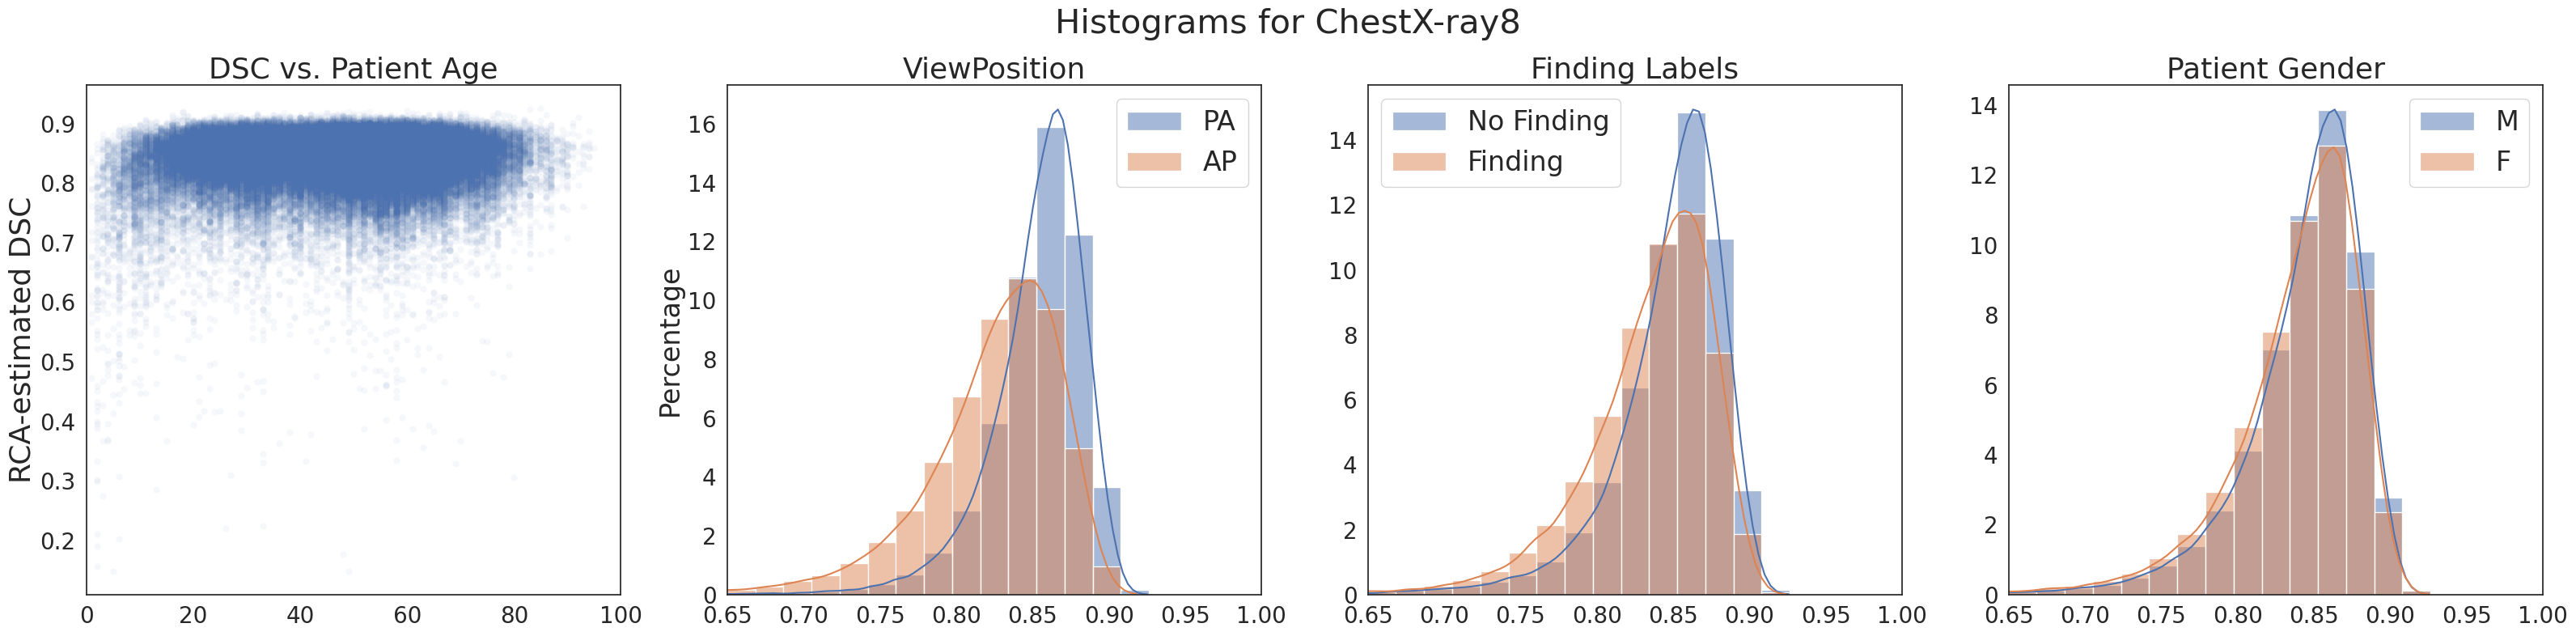

In [65]:
# Create different subsets, first by view position

sub1 = combined_df[combined_df['View Position'] == 'PA']
sub2 = combined_df[combined_df['View Position'] == 'AP']
name1 = "PA"
name2 = "AP"

# Now by "Finding Labels" 
sub3 = combined_df[combined_df['Finding Labels'] == 'No Finding']
sub4 = combined_df[combined_df['Finding Labels'] != 'No Finding']
name3 = "No Finding"
name4 = "Finding"

# Now by Patient Gender
sub5 = combined_df[combined_df['Patient Gender'] == 'M']
sub6 = combined_df[combined_df['Patient Gender'] == 'F']
name5 = "M"
name6 = "F"

fig, axes = plot_comparative_histograms([[sub1, sub2], [sub3, sub4], [sub5, sub6]], 
                                        [[name1, name2], [name3, name4], [name5, name6]], 
                                        ["ViewPosition", "Finding Labels", "Patient Gender"],
                                        "Dice RCA (Mean)",
                                        "ChestX-ray8")

ax = axes[0]

# remove border from the scatterplot
sns.scatterplot(data=combined_df, x="Patient Age", y="Dice RCA (Mean)", ax=ax, alpha=0.05, linewidth=0)
ax.set_title("DSC vs. Patient Age", fontsize=26)
#ax.set_xlabel("Patient Age", fontsize=24)
ax.set_xlabel("", fontsize=24)
ax.set_ylabel("RCA-estimated DSC", fontsize=26)
ax.set_xlim([0, 100])
ax.tick_params(axis='both', which='major', labelsize=20)
        
plt.tight_layout()
plt.savefig("ChestX-ray8.png", dpi=300)
plt.savefig("ChestX-ray8.pdf", dpi=300)

In [66]:
# "Finding Labels" contains the labels for each image, separated by |
# Copy each row in the dataframe for each label in the row
# This will create a dataframe with one label per row

aux = combined_df[['Finding Labels', 'Dice RCA (Mean)']]

# Create a new dataframe with the same columns as the original
df2 = pd.DataFrame(columns=aux.columns)
dfs = []

# Iterate through the rows of the original dataframe
for index, row in aux.iterrows():
    # Split the labels by |
    labels = row['Finding Labels'].split('|')
    # Iterate through the labels
    for label in labels:
        # Create a new row with the same data as the original
        new_row = row.copy()
        # Set the label to the current label
        new_row['Finding Labels'] = label
        # Add the new row to the new dataframe
        df2 = pd.concat([df2, new_row.to_frame().transpose()], ignore_index=True)

    if index % 1000 == 0 and index > 0:
        print(index)
        dfs.append(df2)
        df2 = pd.DataFrame(columns=aux.columns)

df2 = pd.concat(dfs, ignore_index=True)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000


In [67]:
df2_a = df2[df2['Finding Labels'] == 'No Finding']
df2_b = df2[df2['Finding Labels'] != 'No Finding']
df2 = pd.concat([df2_a, df2_b], ignore_index=True)

In [68]:
df2.groupby('Finding Labels').mean().sort_values(by='Dice RCA (Mean)', ascending=False)

,Dice RCA (Mean)
Finding Labels,
Fibrosis,0.849174
Hernia,0.84669
No Finding,0.846637
Nodule,0.846056
Emphysema,0.837511
Mass,0.837384
Pleural_Thickening,0.836229
Pneumothorax,0.836172
Infiltration,0.832672


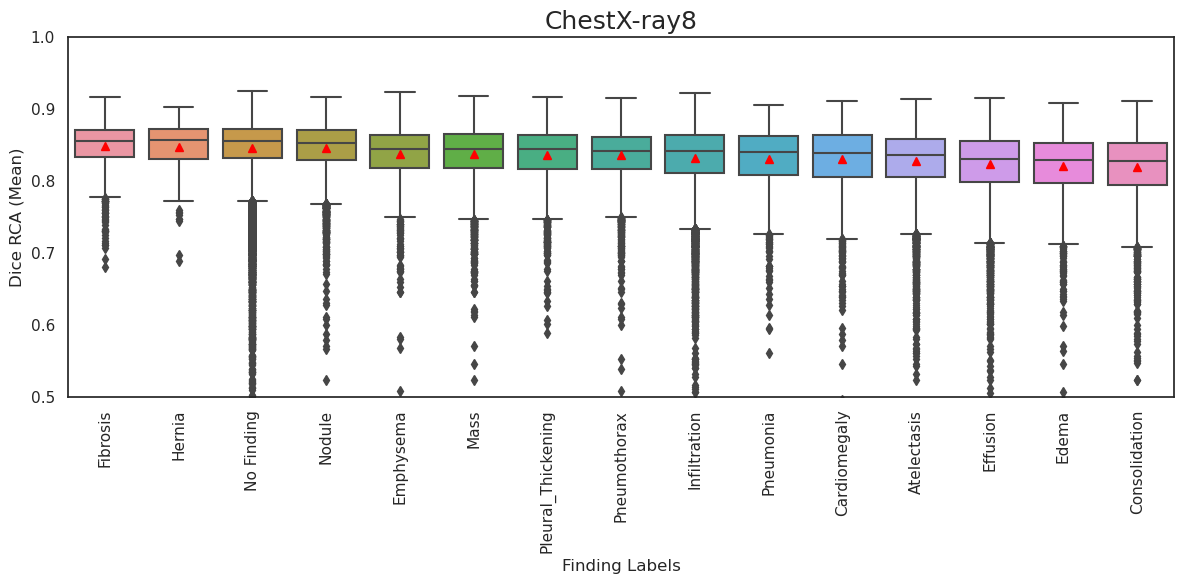

In [69]:
order = df2.groupby('Finding Labels').mean().sort_values(by='Dice RCA (Mean)', ascending=False).index

plt.figure(figsize=(12, 6))

sns.boxplot(y = "Dice RCA (Mean)",  x = "Finding Labels", data = df2, order=order, showmeans=True,
            meanprops={"markerfacecolor":"red", "markeredgecolor":"red"})
plt.ylim(0.5, 1.0)
plt.title("ChestX-ray8", fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("ChestX-ray8_boxplot.png", dpi=300)
plt.savefig("ChestX-ray8_boxplot.pdf", dpi=300)

In [70]:
import pandas as pd 

metadata1 = "CheXpert/train.csv"
df = pd.read_csv(metadata1)
metadata2 = "CheXpert/valid.csv"
df = pd.concat([df, pd.read_csv(metadata2)], ignore_index=True)

rca_path = "../RCA/CheXpert.csv"
rca_df = pd.read_csv(rca_path)

# Add CheXpert-v1.0/ to each path
rca_df.Path = rca_df.Path.apply(lambda x: "CheXpert-v1.0/" + x)

combined_df = df.join(rca_df.set_index('Path'), on='Path')

# remove rows with NaN in the RCA columns

combined_df = combined_df.dropna(subset=['Dice RCA (Mean)'])

# convert NaN to 0 
combined_df = combined_df.fillna(0)

In [71]:
# Finding list 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
# 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
# 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture'

# Merge all the Findings into one column

findings = ['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
            'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
            'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture']

# merge as a boolean

findings_df = combined_df[findings]
findings_df = findings_df.fillna(0)
findings_df = findings_df.astype(bool)
findings_df = findings_df.any(axis=1)

combined_df['Finding'] = findings_df


In [72]:
# Create different subsets for each finding, keep only finding and RCA Mean 

findings = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
            'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
            'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']


new_df = pd.DataFrame(columns=['Finding', 'Dice RCA (Mean)'])

for finding in findings:
    sub = combined_df[combined_df[finding] == 1].loc[:, ['Dice RCA (Mean)']]
    sub['Finding'] = finding
    new_df = pd.concat([new_df, sub], ignore_index=True)
    

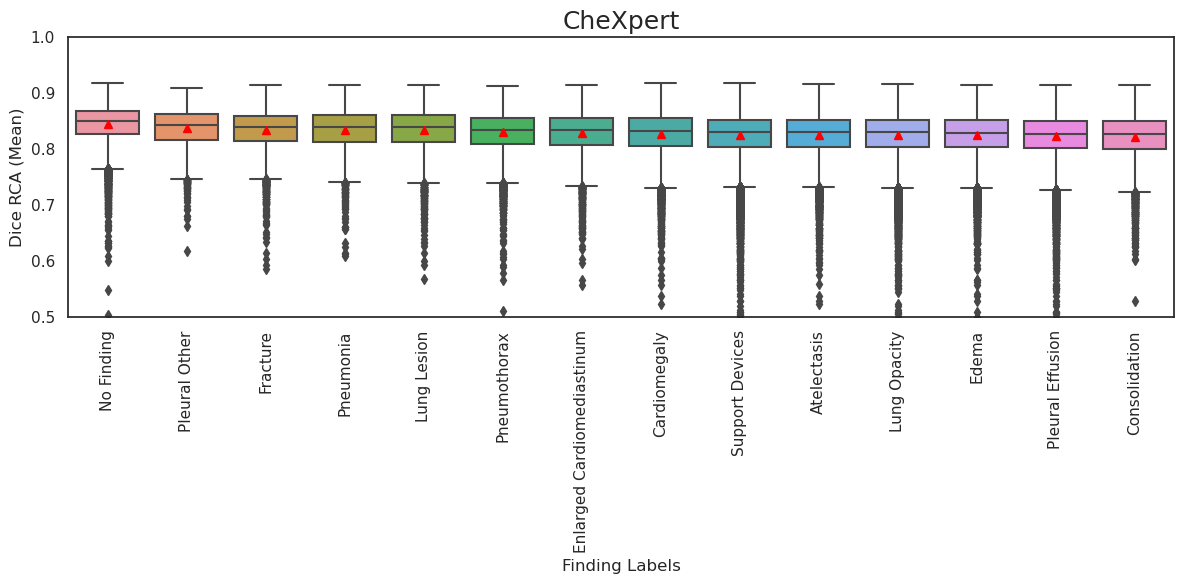

In [73]:
new_df.groupby('Finding').mean().sort_values(by='Dice RCA (Mean)', ascending=False)

findings_order = new_df.groupby('Finding').mean().sort_values(by='Dice RCA (Mean)', ascending=False).index

# Plot the boxplot sorted by the mean RCA

plt.figure(figsize=(12, 6))

sns.boxplot(y = "Dice RCA (Mean)",  x = "Finding", data = new_df, order=findings_order, showmeans=True,
            meanprops={"markerfacecolor":"red", "markeredgecolor":"red"})
plt.ylim(0.5, 1.0)

plt.title("CheXpert", fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel("Finding Labels")
plt.savefig("CheXpert_boxplot.png", dpi=300)
plt.savefig("CheXpert_boxplot.pdf", dpi=300)

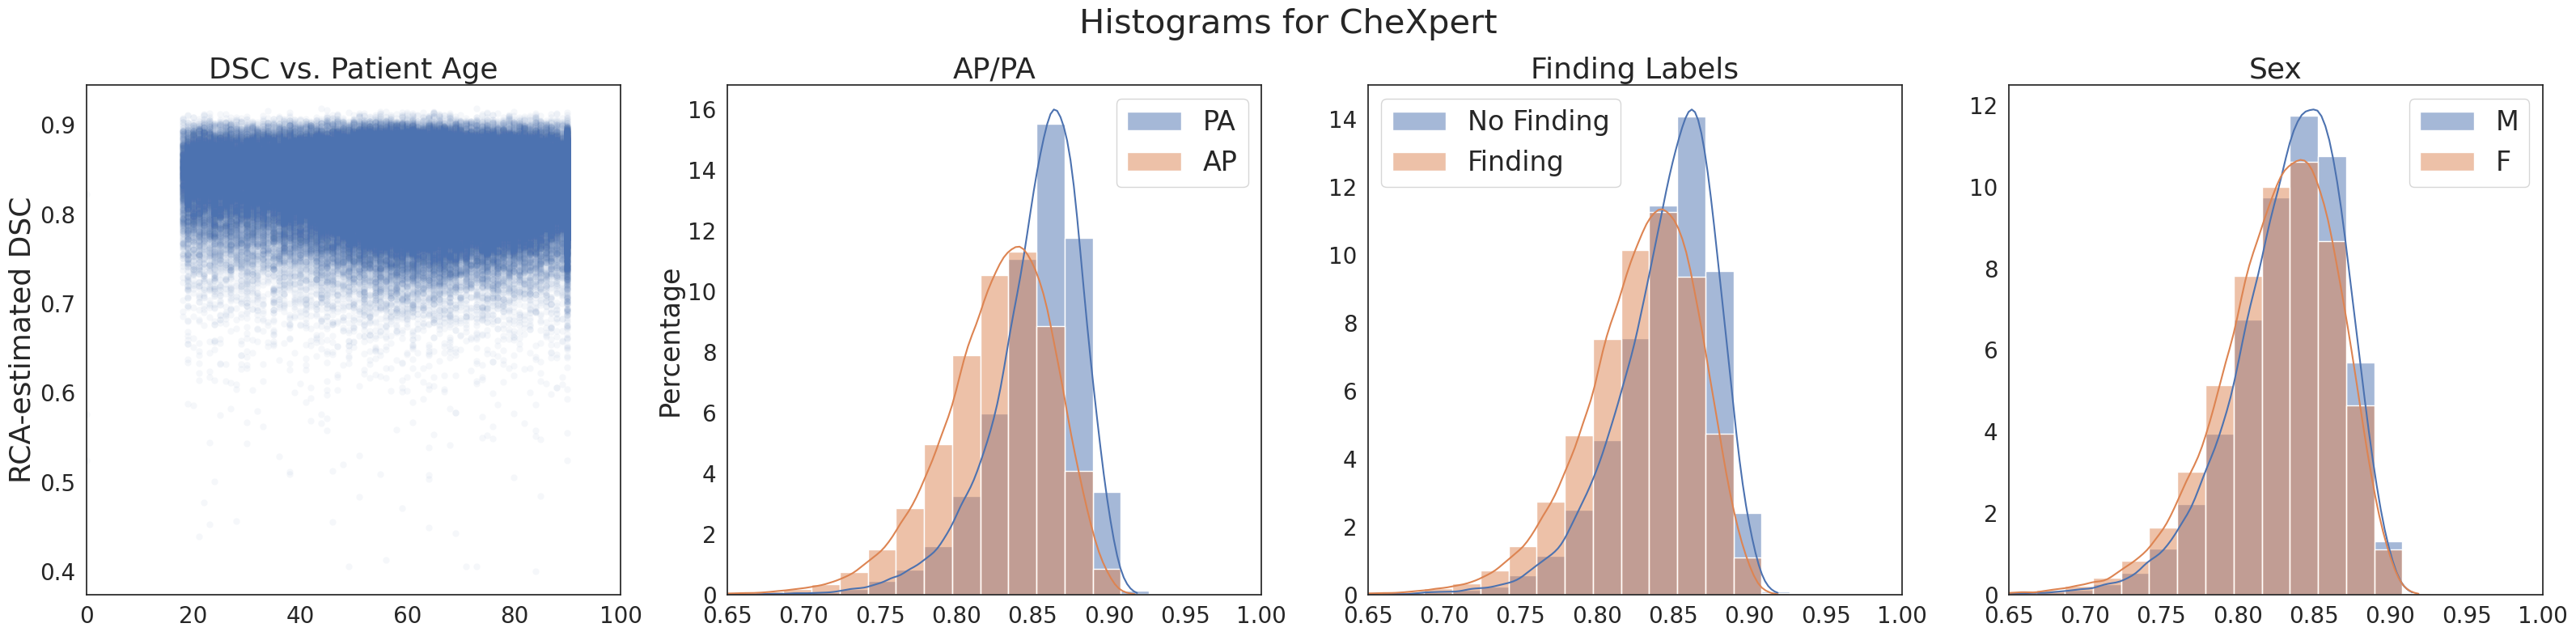

In [74]:
# Create different subsets, first by view position

sub1 = combined_df[combined_df['AP/PA'] == 'PA']
sub2 = combined_df[combined_df['AP/PA'] == 'AP']
name1 = "PA"
name2 = "AP"

# Now by "Finding Labels" 
sub3 = combined_df[combined_df['Finding'] != True]
sub4 = combined_df[combined_df['Finding'] == True]
name3 = "No Finding"
name4 = "Finding"

# Now by Patient Gender
sub5 = combined_df[combined_df['Sex'] == 'Male']
sub6 = combined_df[combined_df['Sex'] == 'Female']
name5 = "M"
name6 = "F"

fig, axes = plot_comparative_histograms([[sub1, sub2], [sub3, sub4], [sub5, sub6]], 
                                        [[name1, name2], [name3, name4], [name5, name6]], 
                                        ["AP/PA", "Finding Labels", "Sex"],
                                        "Dice RCA (Mean)",
                                        "CheXpert")

ax = axes[0]

sns.scatterplot(data=combined_df, x="Age", y="Dice RCA (Mean)", ax=ax, alpha = 0.05, linewidth=0)
ax.set_title("DSC vs. Patient Age", fontsize=26)
#ax.set_xlabel("Patient Age", fontsize=24)
ax.set_xlabel("", fontsize=24)
ax.set_ylabel("RCA-estimated DSC", fontsize=26)
ax.set_xlim([0, 100])
ax.tick_params(axis='both', which='major', labelsize=20)
        
plt.tight_layout()
plt.savefig("CheXpert.png", dpi=300)
plt.savefig("CheXpert.pdf", dpi=300)

In [75]:
import pandas as pd 

metadata1 = "MIMIC-CXR-JPG/mimic-cxr-2.0.0-metadata.csv.gz"
path1 = "MIMIC-CXR-JPG/patients.csv.gz"

In [76]:
df = pd.read_csv(metadata1)[['dicom_id', 'subject_id', 'study_id', 'ViewPosition']]

rca_df = pd.read_csv("../RCA/MIMIC-CXR-JPG.csv")
combined_df = df.join(rca_df.set_index('dicom_id'), on='dicom_id')

# remove rows with NaN in the RCA columns
combined_df = combined_df.dropna(subset=['Dice RCA (Mean)'])
combined_df = combined_df.dropna(subset=['Dice RCA (Max)'])

df2 = pd.read_csv(path1)[["subject_id", "gender", "anchor_age"]]

combined_df = combined_df.join(df2.set_index('subject_id'), on='subject_id')

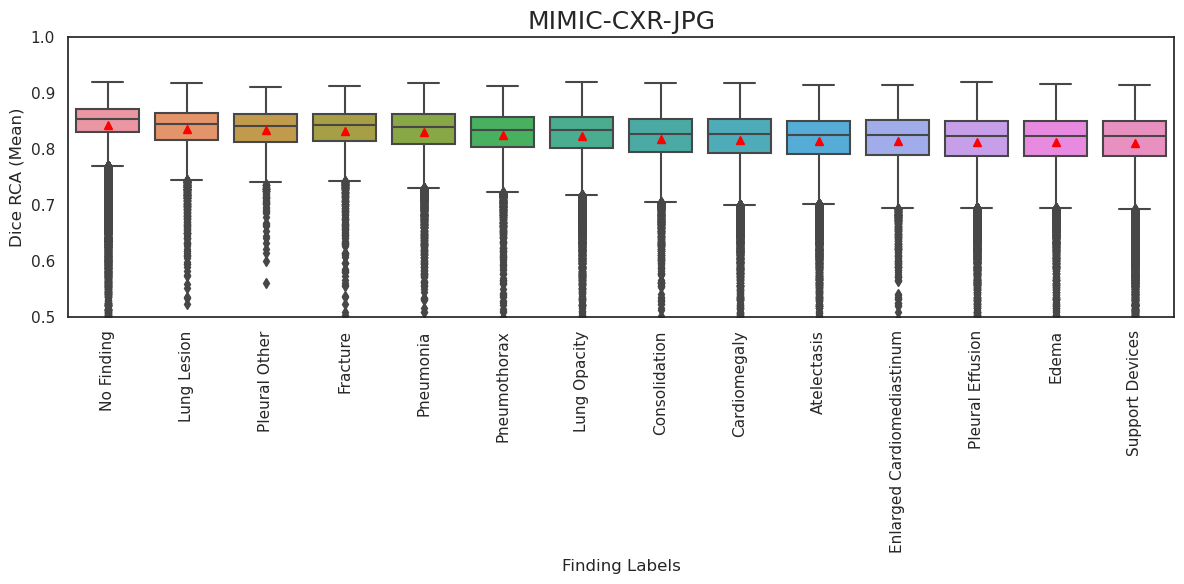

In [77]:
findings = "MIMIC-CXR-JPG/mimic-cxr-2.0.0-chexpert.csv.gz"
df_findings = pd.read_csv(findings)

# combine the findings with the RCA dataframe on subject_id and study_id, both 

combined_df = combined_df.join(df_findings.set_index(['subject_id', 'study_id']), on=['subject_id', 'study_id'])
combined_df.fillna(0, inplace=True)

# Create different subsets for each finding, keep only finding and RCA Mean 

findings = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
            'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
            'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']

new_df = pd.DataFrame(columns=['Finding', 'Dice RCA (Mean)'])

for finding in findings:
    sub = combined_df[combined_df[finding] == 1].loc[:, ['Dice RCA (Mean)']]
    sub['Finding'] = finding
    new_df = pd.concat([new_df, sub], ignore_index=True)

order = new_df.groupby('Finding').mean().sort_values(by='Dice RCA (Mean)', ascending=False).index

plt.figure(figsize=(12, 6))

sns.boxplot(y = "Dice RCA (Mean)",  x = "Finding", data = new_df, order=order, showmeans=True,
            meanprops={"markerfacecolor":"red", "markeredgecolor":"red"})
plt.ylim(0.5, 1.0)
plt.title("MIMIC-CXR-JPG", fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel("Finding Labels")
plt.savefig("MIMIC-CXR-JPG_boxplot.png", dpi=300)
plt.savefig("MIMIC-CXR-JPG_boxplot.pdf", dpi=300)

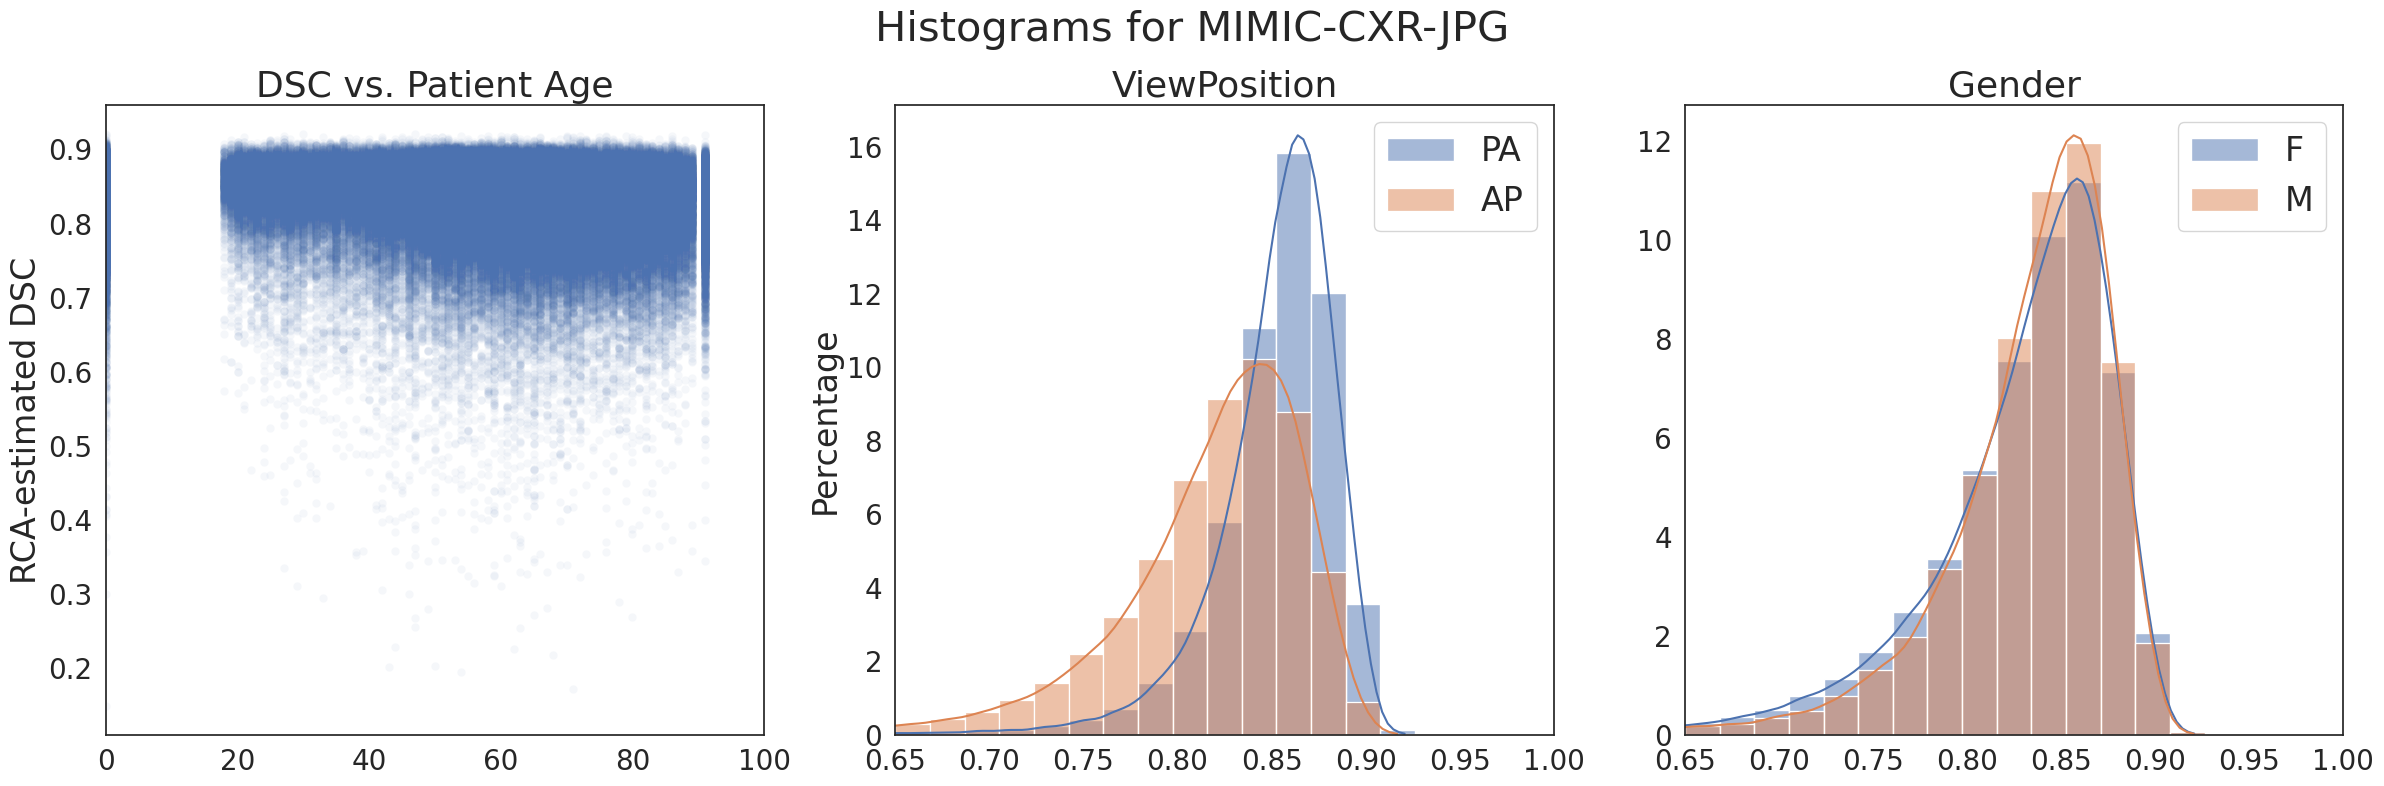

In [78]:
sub1 = combined_df[combined_df['ViewPosition'] == 'PA']
sub2 = combined_df[combined_df['ViewPosition'] == 'AP']
name1 = "PA"
name2 = "AP"

sub3 = combined_df[combined_df['gender'] == 'F']
sub4 = combined_df[combined_df['gender'] == 'M']
name3 = "F"
name4 = "M"

fig, axes = plot_comparative_histograms([[sub1, sub2], [sub3, sub4]], 
                                        [[name1, name2], [name3, name4]], 
                                        ["ViewPosition", "Gender"],
                                        "Dice RCA (Mean)",
                                        "MIMIC-CXR-JPG", True)

ax = axes[0]

# remove border from the scatterplot
sns.scatterplot(data=combined_df, x="anchor_age", y="Dice RCA (Mean)", ax=ax, alpha=0.05, linewidth=0)
ax.set_title("DSC vs. Patient Age", fontsize=26)
#ax.set_xlabel("Patient Age", fontsize=24)
ax.set_xlabel("", fontsize=24)
ax.set_ylabel("RCA-estimated DSC", fontsize=24)
ax.set_xlim([0, 100])
ax.tick_params(axis='both', which='major', labelsize=20)
        
plt.tight_layout()
plt.savefig("MIMIC-CXR-JPG.png", dpi=300)
plt.savefig("MIMIC-CXR-JPG.pdf", dpi=300)

In [79]:
metadata = "Padchest/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv.gz" 
df = pd.read_csv(metadata)[['ImageID', 'PatientSex_DICOM', 'Projection', 'Labels', 'StudyDate_DICOM', 'PatientBirth']]

# estimate age using the first 4 digits of the StudyDate_DICOM and the PatientBirth
df = df.dropna(subset=['StudyDate_DICOM', 'PatientBirth'])
df['StudyDate_DICOM'] = df['StudyDate_DICOM'].astype(str).str[:4].astype(int)
df['PatientBirth'] = df['PatientBirth'].astype(str).str[:4].astype(int)
df['Age'] = df['StudyDate_DICOM'] - df['PatientBirth']
df = df.drop(columns=['StudyDate_DICOM', 'PatientBirth'])

# if label is ['normal'], findings is 0, else 1

df["Findings"] = df.Labels.apply(lambda x: 0 if x == "['normal']" else 1)

rca_df = pd.read_csv("../RCA/Padchest.csv")

combined_df = df.join(rca_df.set_index('ImageID'), on='ImageID')

# drop rows with NaN in the RCA columns
combined_df = combined_df.dropna(subset=['Dice RCA (Mean)'])

In [80]:
np.sum(df['Findings'] == 1)

110517

In [81]:
metadata = "Padchest/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv.gz" 
array = pd.read_csv(metadata)['Labels'].unique().astype(str).tolist()

# remove [, ], " and ' from the labels
array = [x.replace('[', '') for x in array]
array = [x.replace(']', '') for x in array]
array = [x.replace("'", '') for x in array]
array = [x.replace('"', '') for x in array]
array = [x.split(', ') for x in array]
array = [item for sublist in array for item in sublist]
array = list(set(array))

len(array)

351

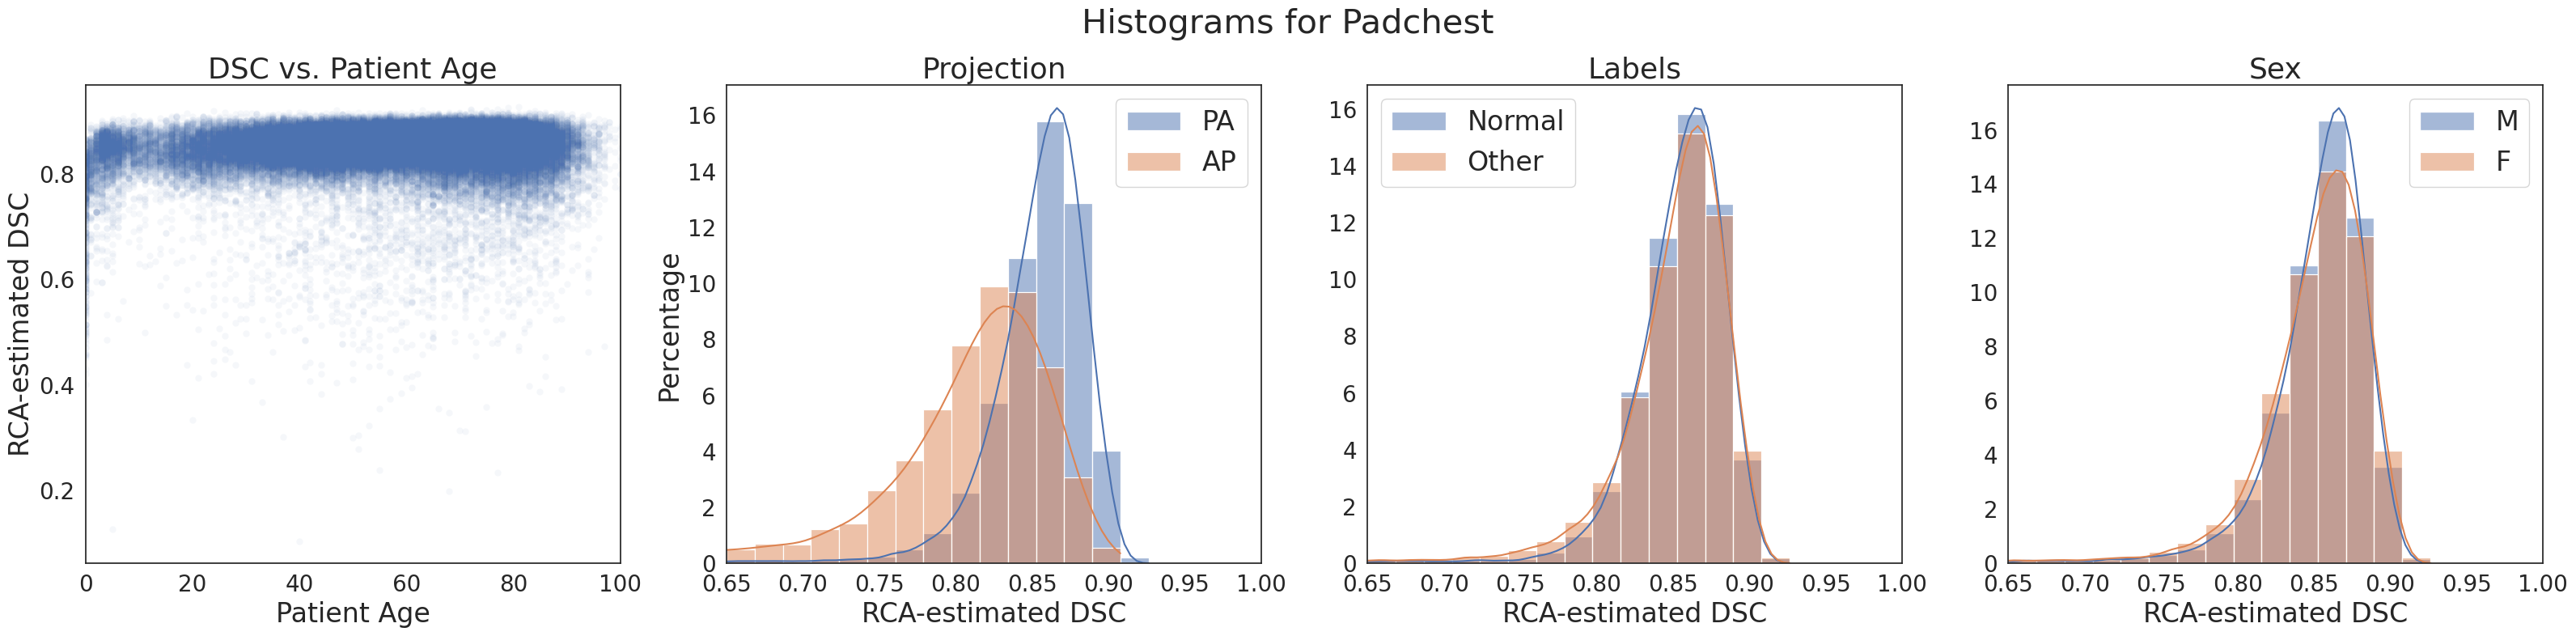

In [82]:
# Create different subsets, first by view position

sub1 = combined_df[combined_df['Projection'] == 'PA']
sub2 = combined_df[combined_df['Projection'] == 'AP']
name1 = "PA"
name2 = "AP"

sub3 = combined_df[combined_df['Findings'] == 0]
sub4 = combined_df[combined_df['Findings'] == 1]
name3 = "Normal"
name4 = "Other"

sub5 = combined_df[combined_df['PatientSex_DICOM'] == 'M']
sub6 = combined_df[combined_df['PatientSex_DICOM'] == 'F']
name5 = "M"
name6 = "F"

fig, axes = plot_comparative_histograms([[sub1, sub2], [sub3, sub4], [sub5, sub6]],
                                        [[name1, name2], [name3, name4], [name5, name6]], 
                                        ["Projection", "Labels", "Sex"],
                                        "Dice RCA (Mean)",
                                        "Padchest", True, True)


ax = axes[0]

# remove border from the scatterplot
sns.scatterplot(data=combined_df, x="Age", y="Dice RCA (Mean)", ax=ax, alpha=0.05, linewidth=0)
ax.set_title("DSC vs. Patient Age", fontsize=26)
ax.set_xlabel("Patient Age", fontsize=24)
ax.set_ylabel("RCA-estimated DSC", fontsize=24)
ax.set_xlim([0, 100])
ax.tick_params(axis='both', which='major', labelsize=20)
        
plt.tight_layout()
plt.savefig("Padchest.png", dpi=300)
plt.savefig("Padchest.pdf", dpi=300)

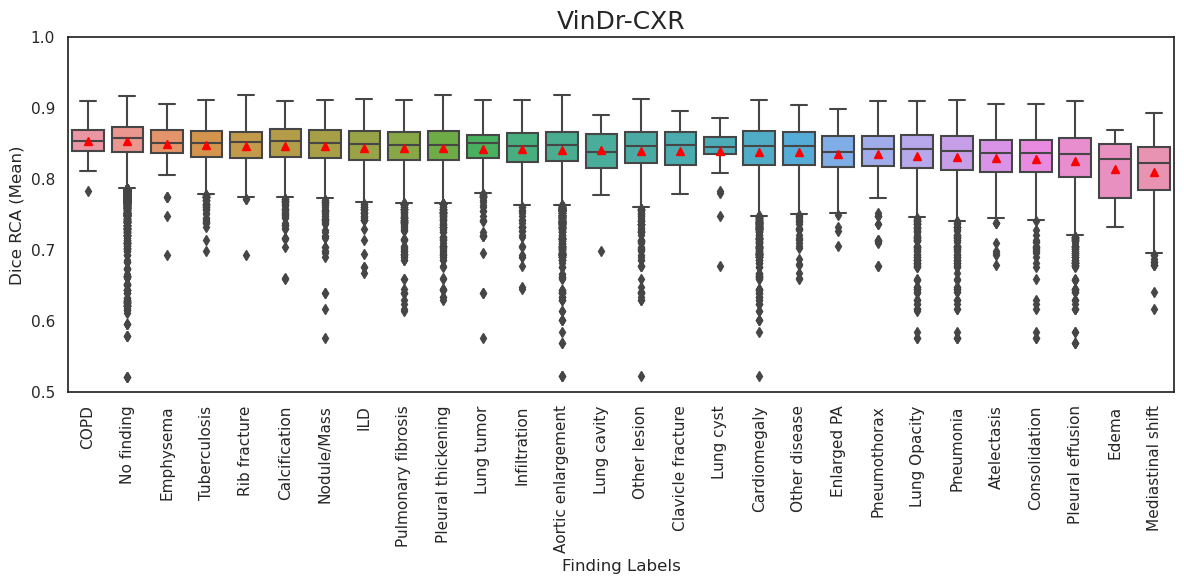

In [83]:
p1 = "VinDr-CXR/image_labels_test.csv"
p2 = "VinDr-CXR/image_labels_train.csv"

df1 = pd.read_csv(p1)
df2 = pd.read_csv(p2)

df = pd.concat([df1, df2], ignore_index=True)

rca_df = pd.read_csv("../RCA/VinDr-CXR.csv")

combined_df = df.join(rca_df.set_index('image_id'), on='image_id')

labels = ['No finding', 'Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Clavicle fracture', 'Consolidation', 'Edema',
       'Emphysema', 'Enlarged PA', 'ILD', 'Infiltration', 'Lung Opacity',
       'Lung cavity', 'Lung cyst', 'Mediastinal shift', 'Nodule/Mass',
       'Pleural effusion', 'Pleural thickening', 'Pneumothorax',
       'Pulmonary fibrosis', 'Rib fracture', 'Other lesion', 'COPD',
       'Lung tumor', 'Pneumonia', 'Tuberculosis', 'Other disease']


new_df = pd.DataFrame(columns=['Finding', 'Dice RCA (Mean)'])

for finding in labels:
    sub = combined_df[np.abs(combined_df[finding]) == 1].loc[:, ['Dice RCA (Mean)']]
    sub['Finding'] = finding
    new_df = pd.concat([new_df, sub], ignore_index=True)
    
order = new_df.groupby('Finding').mean().sort_values(by='Dice RCA (Mean)', ascending=False).index
    
plt.figure(figsize=(12, 6))

sns.boxplot(y = "Dice RCA (Mean)",  x = "Finding", data = new_df, order=order, showmeans=True,
            meanprops={"markerfacecolor":"red", "markeredgecolor":"red"})
plt.ylim(0.5, 1.0)
plt.title("VinDr-CXR", fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel("Finding Labels")
plt.savefig("VinDr-CXR_boxplot.png", dpi=300)
plt.savefig("VinDr-CXR_boxplot.pdf", dpi=300)